In [21]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '85bae2eb-b23c-4cb9-8688-f52aa6640e58',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


{'status': {'timestamp': '2024-02-16T20:05:16.688Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 8830}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10818, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [22]:
type(data)

dict

In [36]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [34]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10818,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962968e+07,1.962968e+07,False,NaN,1,NaN,NaN,None,2024-02-16T20:04:00.000Z,51831.375719,3.168104e+10,-15.1272,-0.276970,-0.389592,8.784743,21.676060,24.193234,41.161818,1.017433e+12,52.6000,1.088459e+12,None,2024-02-16T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:10:59.443934
1,1027,Ethereum,ETH,ethereum,8413,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201656e+08,1.201656e+08,True,NaN,2,NaN,NaN,None,2024-02-16T20:04:00.000Z,2767.035715,1.815314e+10,-23.6755,-0.499035,-2.349141,11.092551,9.273322,27.098004,40.663055,3.325025e+11,17.1910,3.325025e+11,None,2024-02-16T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:10:59.443934
2,825,Tether USDt,USDT,tether,74726,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.745599e+10,9.960008e+10,True,NaN,3,NaN,NaN,None,2024-02-16T20:03:00.000Z,1.000322,5.771172e+10,-15.8202,-0.001736,-0.051270,-0.013510,0.110030,0.041534,-0.028488,9.748739e+10,5.0403,9.963217e+10,None,2024-02-16T20:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-16 15:10:59.443934
3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495446e+08,1.495446e+08,False,NaN,4,NaN,NaN,None,2024-02-16T20:03:00.000Z,354.755297,1.494911e+09,-11.4625,-0.581475,-0.418510,9.745618,15.106672,48.655157,44.692415,5.305174e+10,2.7427,5.305174e+10,None,2024-02-16T20:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:10:59.443934
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.405011e+08,5.697084e+08,True,NaN,5,NaN,NaN,None,2024-02-16T20:04:00.000Z,108.653231,2.103863e+09,-9.6142,-0.643863,-4.951563,3.167405,7.910874,49.908116,83.680767,4.786187e+10,2.4745,6.190066e+10,None,2024-02-16T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:10:59.443934
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,None,2024-02-16T20:04:00.000Z,0.561234,1.839249e+09,19.3077,-0.678856,1.151743,6.631096,-1.756759,-7.408932,-8.585663,3.062016e+10,1.5830,5.612344e+10,None,2024-02-16T20:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:10:59.443934
6,3408,USDC,USDC,usd-coin,16728,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.808137e+10,2.808137e+10,False,NaN,7,NaN,NaN,None,2024-02-16T20:04:00.000Z,0.999736,6.599607e+09,-9.4110,-0.014552,-0.032472,-0.035602,-0.043719,-0.051400,-0.038901,2.807395e+10,1.4514,2.807395e+10,None,2024-02-16T20:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-16 15:10:59.443934
7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545131e+10,3.662821e+10,False,NaN,8,NaN,NaN,None,2024-02-16T20:03:00.000Z,0.589663,6.064476e+08,-17.4201,-0.441389,-2.205870,8.678028,11.712477,1.922371,57.703516,2.090434e+10,1.0808,2.653486e+10,None,2024-02-16T20:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:10:59.443934
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p

In [40]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '85bae2eb-b23c-4cb9-8688-f52aa6640e58',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r"C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv"):
        df.to_csv(r"C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv", header = 'column_names')
    else:
         df.to_csv(r"C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv", mode ='a', header=False)

In [42]:
import os 
from time import time 
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(10) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-02-16T20:20:07.968Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 8830}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10818, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

KeyboardInterrupt: 

In [43]:
df10 = pd.read_csv(r'C:\Users\Titus\Downloads\Reading Files in Pandas\API.csv')
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10818,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.962971e+07,1.962971e+07,False,NaN,1,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,51769.871364,3.166176e+10,-15.0014,-0.493187,0.105950,8.644397,21.437680,24.217320,41.550831,1.016228e+12,52.4938,1.087167e+12,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
1,1,1027,Ethereum,ETH,ethereum,8413,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201656e+08,1.201656e+08,True,NaN,2,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,2772.450283,1.824926e+10,-22.8702,-0.352508,-1.714862,11.268171,9.493128,27.619766,41.252384,3.331531e+11,17.2041,3.331531e+11,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
2,2,825,Tether USDt,USDT,tether,74726,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.745599e+10,9.960008e+10,True,NaN,3,NaN,NaN,NaN,2024-02-16T20:17:00.000Z,1.000302,5.775589e+10,-15.5092,-0.001414,-0.057352,-0.030978,0.087161,-0.000383,-0.035631,9.748539e+10,5.0342,9.963013e+10,NaN,2024-02-16T20:17:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-16 15:19:39.730989
3,3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.495446e+08,1.495446e+08,False,NaN,4,NaN,NaN,NaN,2024-02-16T20:17:00.000Z,355.683015,1.494152e+09,-11.6714,-0.436148,0.606325,9.826848,15.435736,49.408141,45.446830,5.319047e+10,2.7476,5.319047e+10,NaN,2024-02-16T20:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.405009e+08,5.697082e+08,True,NaN,5,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,109.114316,2.102970e+09,-9.5995,-0.388670,-4.330750,3.614469,8.622319,51.421947,85.410223,4.806496e+10,2.4821,6.216332e+10,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
5,5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.455860e+10,9.998790e+10,False,NaN,6,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,0.562668,1.839434e+09,19.1858,-0.327246,1.531330,6.852975,-1.428261,-6.875447,-8.141723,3.069840e+10,1.5857,5.626684e+10,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
6,6,3408,USDC,USDC,usd-coin,16728,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.809524e+10,2.809524e+10,False,NaN,7,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,0.999977,6.594629e+09,-9.1880,0.016084,0.008309,-0.003563,-0.038209,-0.041601,-0.007568,2.809459e+10,1.4512,2.809459e+10,NaN,2024-02-16T20:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-16 15:19:39.730989
7,7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.545136e+10,3.662821e+10,False,NaN,8,NaN,NaN,NaN,2024-02-16T20:17:00.000Z,0.590899,6.051426e+08,-17.7516,-0.326348,-1.862836,8.772214,12.061105,2.545195,58.306596,2.094819e+10,1.0818,2.659048e+10,NaN,2024-02-16T20:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
8,8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-a

In [44]:
pd.set_option('display.float_format',lambda x: '%.5f' % x)

In [45]:
df10

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10818,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19629712.00000,19629712.00000,False,NaN,1,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,51769.87136,31661759202.72533,-15.00140,-0.49319,0.10595,8.64440,21.43768,24.21732,41.55083,1016227665146.76196,52.49380,1087167298638.00000,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
1,1,1027,Ethereum,ETH,ethereum,8413,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120165596.08996,120165596.08996,True,NaN,2,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,2772.45028,18249260745.63980,-22.87020,-0.35251,-1.71486,11.26817,9.49313,27.61977,41.25238,333153140943.21698,17.20410,333153140943.21997,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
2,2,825,Tether USDt,USDT,tether,74726,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,97455987376.17133,99600078701.92628,True,NaN,3,NaN,NaN,NaN,2024-02-16T20:17:00.000Z,1.00030,57755890177.05392,-15.50920,-0.00141,-0.05735,-0.03098,0.08716,-0.00038,-0.03563,97485391060.37772,5.03420,99630129285.17000,NaN,2024-02-16T20:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-16 15:19:39.730989
3,3,1839,BNB,BNB,bnb,2066,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149544597.21452,149544597.21452,False,NaN,4,NaN,NaN,NaN,2024-02-16T20:17:00.000Z,355.68301,1494151566.81794,-11.67140,-0.43615,0.60633,9.82685,15.43574,49.40814,45.44683,53190473207.28091,2.74760,53190473207.28000,NaN,2024-02-16T20:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
4,4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,440500913.93261,569708185.76225,True,NaN,5,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,109.11432,2102970394.28681,-9.59950,-0.38867,-4.33075,3.61447,8.62232,51.42195,85.41022,48064955756.84991,2.48210,62163318796.58000,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
5,5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,54558598490.00000,99987895338.00000,False,NaN,6,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,0.56267,1839433721.56843,19.18580,-0.32725,1.53133,6.85297,-1.42826,-6.87545,-8.14172,30698397100.91257,1.58570,56266835935.20000,NaN,2024-02-16T20:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-16 15:19:39.730989
6,6,3408,USDC,USDC,usd-coin,16728,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28095243388.95145,28095243388.95145,False,NaN,7,NaN,NaN,NaN,2024-02-16T20:18:00.000Z,0.99998,6594629302.36719,-9.18800,0.01608,0.00831,-0.00356,-0.03821,-0.04160,-0.00757,28094586583.85914,1.45120,28094586583.86000,NaN,2024-02-16T20:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-16 15:19:39.730989
7,7,2010,Cardano,ADA,cardano,1074,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35451362106.65500,36628205944.37800,False,NaN,8,NaN,NaN,NaN,2024-02-16T20:17:00.000Z,0.59090,605142619.12979,-17.75160,-0.32635,-1.86284,8.77221,12.06111,2.54520,58.30660,20948191910.17009,1.08180,26590477204.28000,NaN,2024-02-1

In [63]:
df3 =df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.36522,0.20482,8.68438,21.50341,24.46780,41.63697
Ethereum,-0.32125,-1.59768,11.31694,9.55159,27.85479,41.32439
Tether USDt,0.02595,-0.03651,-0.01320,0.08384,0.03102,-0.02967
BNB,-0.48332,0.58706,9.81816,15.42528,49.37634,45.42871
Solana,-0.41278,-4.12695,3.67902,8.67422,51.49383,85.47570
XRP,-0.38479,1.62502,6.85175,-1.42141,-6.91241,-8.22324
USDC,-0.01635,-0.02081,-0.01108,-0.02334,-0.03374,-0.01369
Cardano,-0.31908,-1.81334,8.78763,12.09231,2.58088,58.35447
Avalanche,-0.57978,-4.43108,3.93731,11.09229,0.68459,80.71514


In [64]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h    -0.36522
             quote.USD.percent_change_24h    0.20482
             quote.USD.percent_change_7d     8.68438
             quote.USD.percent_change_30d   21.50341
             quote.USD.percent_change_60d   24.46780
             quote.USD.percent_change_90d   41.63697
Ethereum     quote.USD.percent_change_1h    -0.32125
             quote.USD.percent_change_24h   -1.59768
             quote.USD.percent_change_7d    11.31694
             quote.USD.percent_change_30d    9.55159
             quote.USD.percent_change_60d   27.85479
             quote.USD.percent_change_90d   41.32439
Tether USDt  quote.USD.percent_change_1h     0.02595
             quote.USD.percent_change_24h   -0.03651
             quote.USD.percent_change_7d    -0.01320
             quote.USD.percent_change_30d    0.08384
             quote.USD.percent_change_60d    0.03102
             quote.USD.percent_change_90d   -0.02967
BNB 

In [65]:
df5 = df4.to_frame(name='values')
df5

values
name                                             
Bitcoin     quote.USD.percent_change_1h  -0.36522
            quote.USD.percent_change_24h  0.20482
            quote.USD.percent_change_7d   8.68438
            quote.USD.percent_change_30d 21.50341
            quote.USD.percent_change_60d 24.46780
            quote.USD.percent_change_90d 41.63697
Ethereum    quote.USD.percent_change_1h  -0.32125
            quote.USD.percent_change_24h -1.59768
            quote.USD.percent_change_7d  11.31694
            quote.USD.percent_change_30d  9.55159
            quote.USD.percent_change_60d 27.85479
            quote.USD.percent_change_90d 41.32439
Tether USDt quote.USD.percent_change_1h   0.02595
            quote.USD.percent_change_24h -0.03651
            quote.USD.percent_change_7d  -0.01320
            quote.USD.percent_change_30d  0.08384
            quote.USD.percent_change_60d  0.03102
            quote.USD.percent_change_90d -0.02967
BNB         quote.USD.percent_change_1h  -0.48332
            quote.USD.percent_change_24h  0.58706
            quote.USD.percent_change_7d   9.81816
            quote.USD.percent_change_30d 15.42528
            quote.USD.percent_change_60d 49.37634
            quote.USD.percent_change_90d 45.42871
Solana      quote.USD.percent_change_1h  -0.41278
            quote.USD.percent_change_24h -4.12695
            quote.USD.percent_change_7d   3.67902
            quote.USD.percent_change_30d  8.67422
            quote.USD.percent_change_60d 51.49383
            quote.USD.percent_change_90d 85.47570
XRP         quote.USD.percent_change_1h  -0.38479
            quote.USD.percent_change_24h  1.62502
            quote.USD.percent_change_7d   6.85175
            quote.USD.percent_change_30d -1.42141
            quote.USD.percent_change_60d -6.91241
            quote.USD.percent_change_90d -8.22324
USDC        quote.USD.percent_change_1h  -0.01635
            quote.USD.percent_change_24h -0.02081
            quote.USD.percent_change_7d  -0.01108
            quote.USD.percent_change_30d -0.02334
            quote.USD.percent_change_60d -0.03374
            quote.USD.percent_change_90d -0.01369
Cardano     quote.USD.percent_change_1h  -0.31908
            quote.USD.percent_change_24h -1.81334
            quote.USD.percent_change_7d   8.78763
            quote.USD.percent_change_30d 12.09231
            quote.USD.percent_change_60d  2.58088
            quote.USD.percent_change_90d 58.35447
Avalanche   quote.USD.percent_change_1h  -0.57978
            quote.USD.percent_change_24h -4.43108
            quote.USD.percent_change_7d   3.93731
            quote.USD.percent_change_30d 11.09229
            quote.USD.percent_change_60d  0.68459
            quote.USD.percent_change_90d 80.71514
Dogecoin    quote.USD.percent_change_1h  -0.35873
            quote.USD.percent_change_24h -0.08320
            quote.USD.percent_change_7d   4.26096
            quote.USD.percent_change_30d  5.79309
            quote.USD.percent_change_60d -5.61217
            quote.USD.percent_change_90d  4.73268
TRON        quote.USD.percent_change_1h   0.06540
            quote.USD.percent_change_24h  0.72431
            quote.USD.percent_change_7d   6.76282
            quote.USD.percent_change_30d 22.11910
            quote.USD.percent_change_60d 32.22058
            quote.USD.percent_change_90d 28.32258
Chainlink   quote.USD.percent_change_1h  -0.11005
            quote.USD.percent_change_24h -3.24037
            quote.USD.percent_change_7d   5.68977
            quote.USD.percent_change_30d 22.11361
            quote.USD.percent_change_60d 35.59443
            quote.USD.percent_change_90d 41.59197
Polkadot    quote.USD.percent_change_1h  -0.50419
            quote.USD.percent_change_24h -1.90355
            quote.USD.percent_change_7d   5.76075
            quote.USD.percent_change_30d  3.57487
            quote.USD.percent_change_60d 13.71532
            quote.USD.percent_change_90d 44.59531
Polygon     quote.USD.percent_change_1h  -0

In [66]:
df5.count()

values    90
dtype: int64

In [67]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.36522
1,Bitcoin,quote.USD.percent_change_24h,0.20482
2,Bitcoin,quote.USD.percent_change_7d,8.68438
3,Bitcoin,quote.USD.percent_change_30d,21.50341
4,Bitcoin,quote.USD.percent_change_60d,24.46780
5,Bitcoin,quote.USD.percent_change_90d,41.63697
6,Ethereum,quote.USD.percent_change_1h,-0.32125
7,Ethereum,quote.USD.percent_change_24h,-1.59768
8,Ethereum,quote.USD.percent_change_7d,11.31694
9,Ethereum,quote.USD.percent_change_30d,9.55159


In [69]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.36522
1,Bitcoin,quote.USD.percent_change_24h,0.20482
2,Bitcoin,quote.USD.percent_change_7d,8.68438
3,Bitcoin,quote.USD.percent_change_30d,21.50341
4,Bitcoin,quote.USD.percent_change_60d,24.46780
5,Bitcoin,quote.USD.percent_change_90d,41.63697
6,Ethereum,quote.USD.percent_change_1h,-0.32125
7,Ethereum,quote.USD.percent_change_24h,-1.59768
8,Ethereum,quote.USD.percent_change_7d,11.31694
9,Ethereum,quote.USD.percent_change_30d,9.55159


In [72]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.36522
1,Bitcoin,24hr,0.20482
2,Bitcoin,7d,8.68438
3,Bitcoin,30d,21.50341
4,Bitcoin,60d,24.46780
5,Bitcoin,90d,41.63697
6,Ethereum,1hr,-0.32125
7,Ethereum,24hr,-1.59768
8,Ethereum,7d,11.31694
9,Ethereum,30d,9.55159


In [73]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1hr'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h'],['24hr'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.36522
1,Bitcoin,24hr,0.20482
2,Bitcoin,7d,8.68438
3,Bitcoin,30d,21.50341
4,Bitcoin,60d,24.46780
5,Bitcoin,90d,41.63697
6,Ethereum,1hr,-0.32125
7,Ethereum,24hr,-1.59768
8,Ethereum,7d,11.31694
9,Ethereum,30d,9.55159


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Titus\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


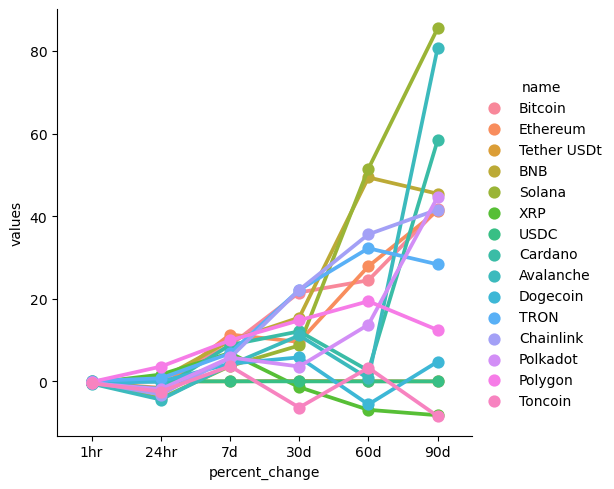

In [74]:
sns.catplot(x='percent_change', y ='values', hue='name', data=df7,kind='point')

In [75]:
df11 = df[['name','quote.USD.price','timestamp']]
df11 = df11.query("name == 'BitCoin'")
df11

,name,quote.USD.price,timestamp
